<h10>Ce code montre plusieurs jeu de données pour les capteurs TESS-W et CGR-4 de la Station BSRN du laboratoire EnergyLab</h10>

<h3>Importation des librairies</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

In [2]:
df = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier csv/TESS-W CGR-4 03-05 10-05 filtré.csv", delimiter=';')

In [3]:
dfnan = df.dropna()
Date = df.set_index(df['hour'], inplace=True)
P_tsky = 5.670374*10**-8*(df['tsky']+273)**4
P_tskynan = 5.670374*10**-8*(dfnan['tsky']+273)**4

<h3>Affichage des graphes</h3>

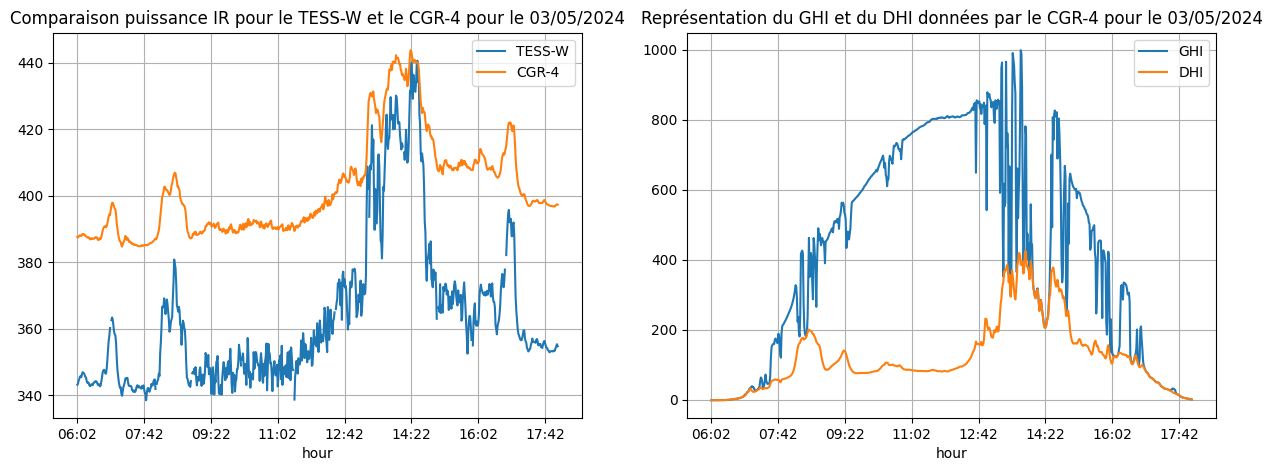

MAE : 38.05265598138942
RMSE : 39.12424966716587
MedAE: 41.222139844061076


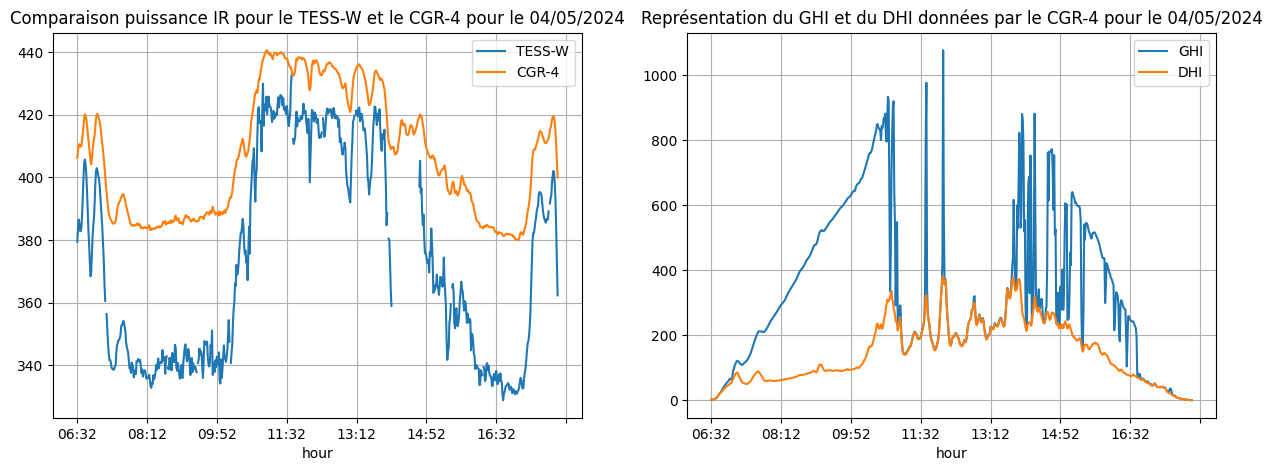

MAE : 34.78589161112609
RMSE : 37.07306817892556
MedAE: 40.81735382844607


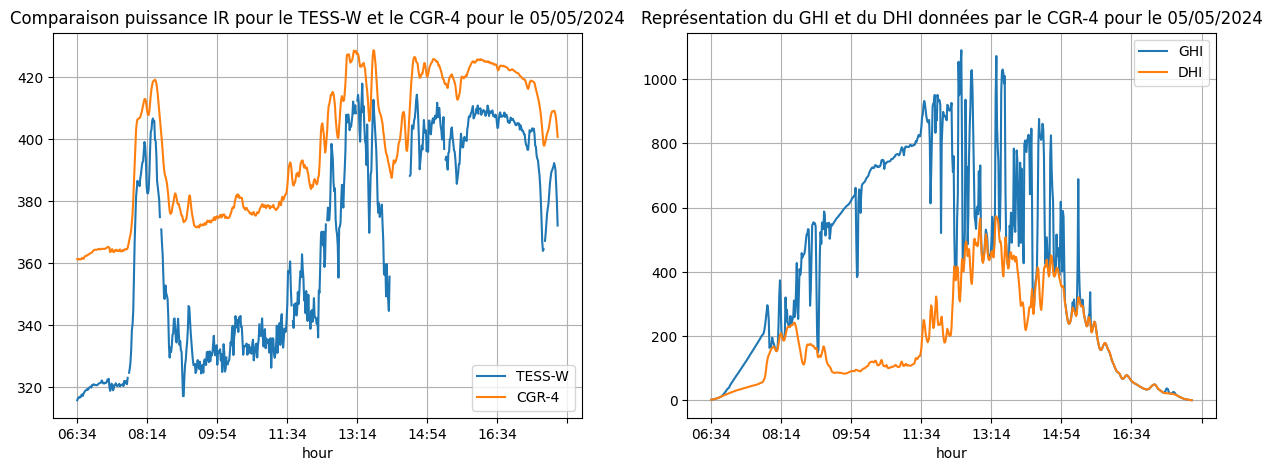

MAE : 31.00792605460841
RMSE : 33.26568292376707
MedAE: 31.99740846145602


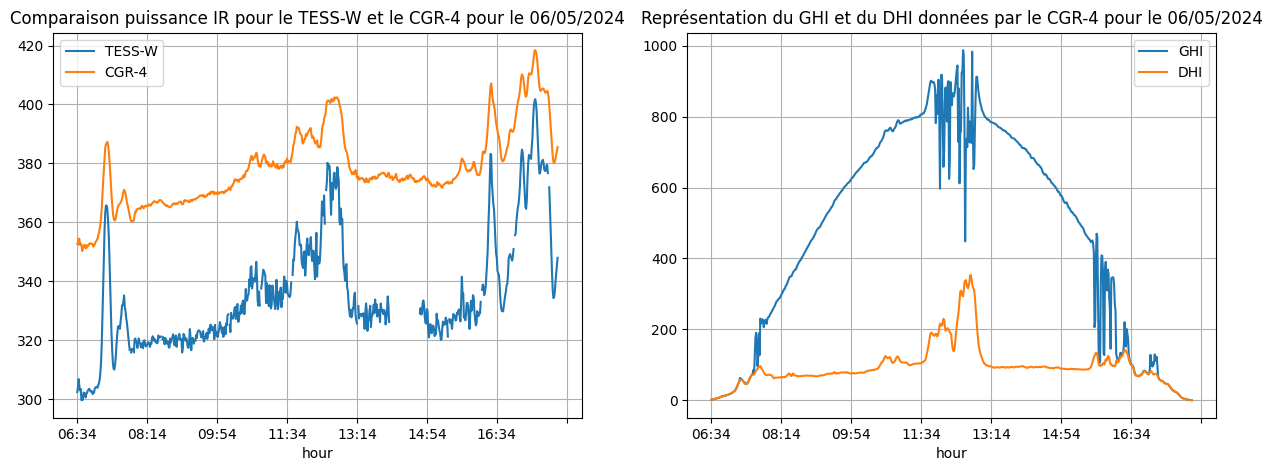

MAE : 43.56225811719102
RMSE : 44.11670995911281
MedAE: 46.26408479314793


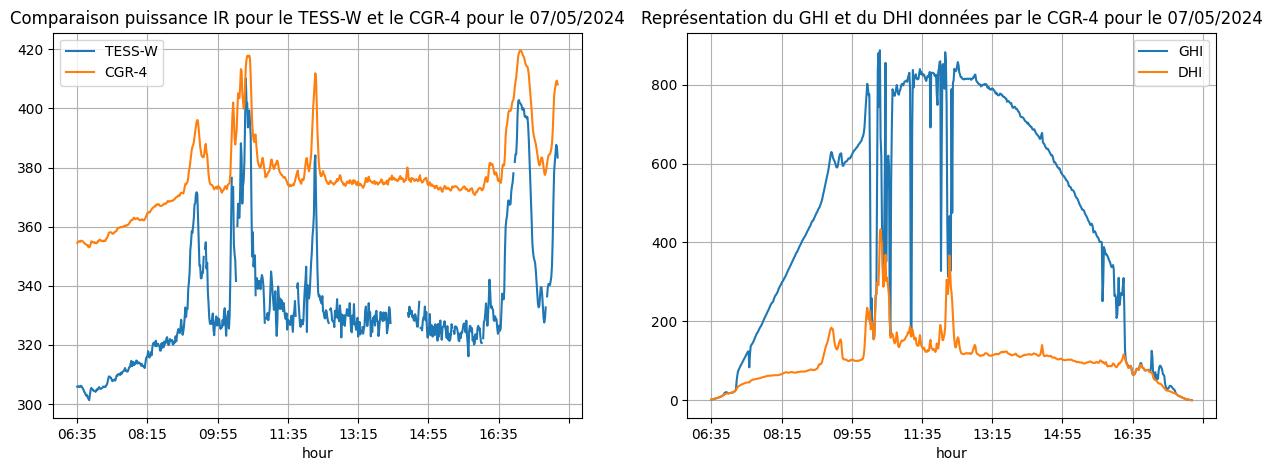

MAE : 44.69346091179653
RMSE : 45.51703272361331
MedAE: 47.5103146329883


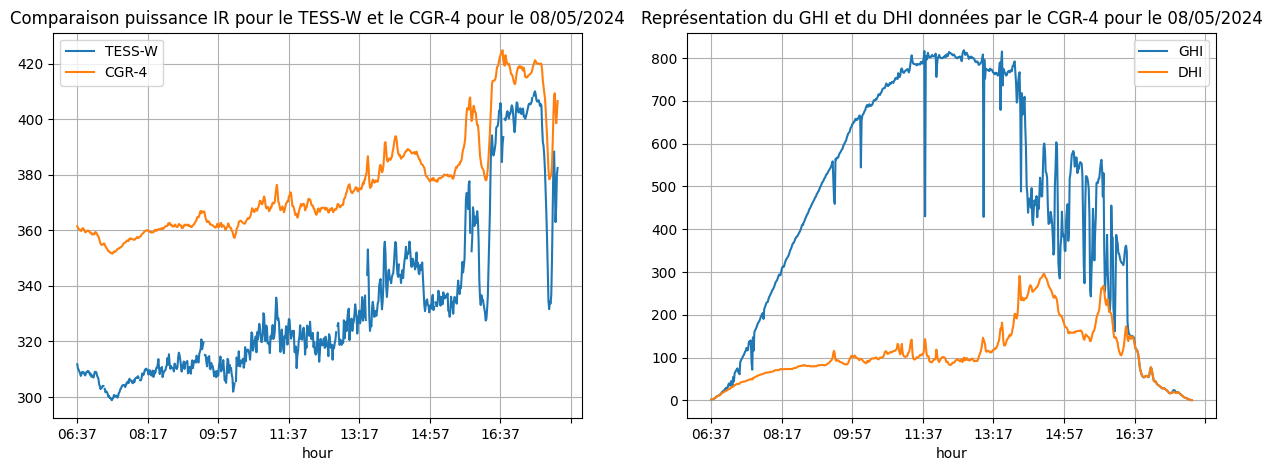

MAE : 40.83198255422613
RMSE : 42.30145339971102
MedAE: 44.84672772133419


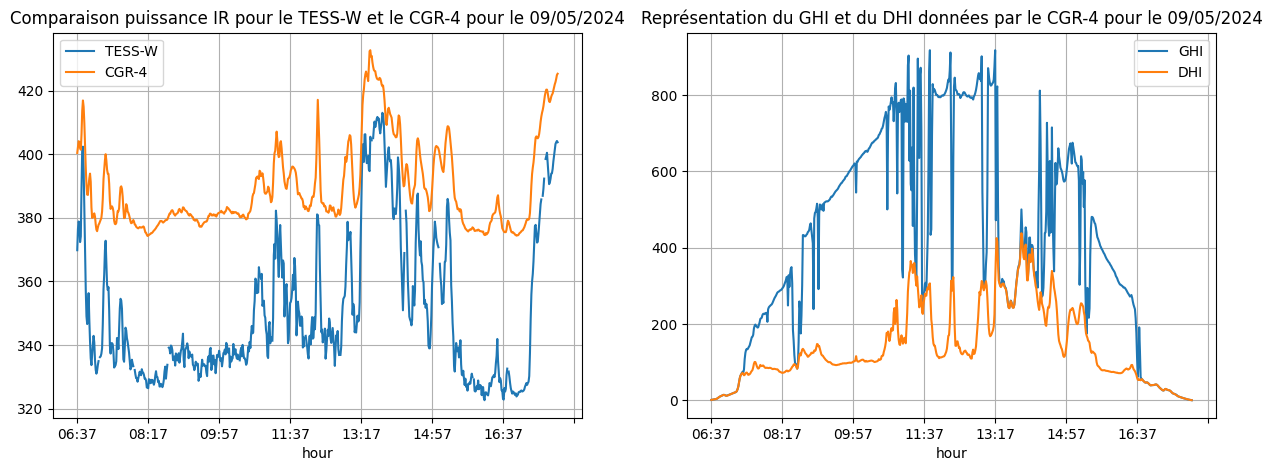

MAE : 39.13991104967407
RMSE : 41.17114372067764
MedAE: 44.60362899446548


In [4]:
fig, ax1 = plt.subplots(1,2)

P_tsky[362:1082].plot(ax=ax1[0], figsize=(15,5), label='TESS-W', title='Comparaison puissance IR pour le TESS-W et le CGR-4 pour le 03/05/2024')
df['IR 1'][362:1082].plot(ax=ax1[0], label='CGR-4')

df['GHI'][362:1082].plot(ax=ax1[1], figsize=(15,5), title='Représentation du GHI et du DHI données par le CGR-4 pour le 03/05/2024')
df['DHI'][362:1082].plot(ax=ax1[1])

ax1[0].legend()
ax1[0].grid()
ax1[1].legend()
ax1[1].grid()

plt.show()

print('MAE :', mean_absolute_error((dfnan['IR 1'][362:1082]), P_tskynan[362:1082]))
print('RMSE :', np.sqrt(mean_squared_error((dfnan['IR 1'][362:1082]), P_tskynan[362:1082])))
print('MedAE:', median_absolute_error((dfnan['IR 1'][362:1082]), P_tskynan[362:1082]))

#############################################################################
fig, ax2 = plt.subplots(1,2)

P_tsky[1832:2521].plot(ax=ax2[0], figsize=(15,5), label='TESS-W', title='Comparaison puissance IR pour le TESS-W et le CGR-4 pour le 04/05/2024')
df['IR 1'][1832:2521].plot(ax=ax2[0], label='CGR-4')

df['GHI'][1832:2521].plot(ax=ax2[1], figsize=(15,5), title='Représentation du GHI et du DHI données par le CGR-4 pour le 04/05/2024')
df['DHI'][1832:2521].plot(ax=ax2[1])

ax2[0].legend()
ax2[0].grid()
ax2[1].legend()
ax2[1].grid()
plt.show()

print('MAE :', mean_absolute_error((dfnan['IR 1'][1832:2521]), P_tskynan[1832:2521]))
print('RMSE :', np.sqrt(mean_squared_error((dfnan['IR 1'][1832:2521]), P_tskynan[1832:2521])))
print('MedAE:', median_absolute_error((dfnan['IR 1'][1832:2521]), P_tskynan[1832:2521]))

################################################################################

fig, ax3 = plt.subplots(1,2)

P_tsky[3274:3961].plot(ax=ax3[0], figsize=(15,5), label='TESS-W', title='Comparaison puissance IR pour le TESS-W et le CGR-4 pour le 05/05/2024')
df['IR 1'][3274:3961].plot(ax=ax3[0], label='CGR-4')

df['GHI'][3274:3961].plot(ax=ax3[1], figsize=(15,5), title='Représentation du GHI et du DHI données par le CGR-4 pour le 05/05/2024')
df['DHI'][3274:3961].plot(ax=ax3[1])

ax3[0].legend()
ax3[0].grid()
ax3[1].legend()
ax3[1].grid()
plt.show()

print('MAE :', mean_absolute_error((dfnan['IR 1'][3274:3961]), P_tskynan[3274:3961]))
print('RMSE :', np.sqrt(mean_squared_error((dfnan['IR 1'][3274:3961]), P_tskynan[3274:3961])))
print('MedAE:', median_absolute_error((dfnan['IR 1'][3274:3961]), P_tskynan[3274:3961]))

################################################################################

fig, ax4 = plt.subplots(1,2)

P_tsky[4714:5402].plot(ax=ax4[0], figsize=(15,5), label='TESS-W', title='Comparaison puissance IR pour le TESS-W et le CGR-4 pour le 06/05/2024')
df['IR 1'][4714:5402].plot(ax=ax4[0], label='CGR-4')

df['GHI'][4714:5402].plot(ax=ax4[1], figsize=(15,5), title='Représentation du GHI et du DHI données par le CGR-4 pour le 06/05/2024')
df['DHI'][4714:5402].plot(ax=ax4[1])

ax4[0].legend()
ax4[0].grid()
ax4[1].legend()
ax4[1].grid()
plt.show()

print('MAE :', mean_absolute_error((dfnan['IR 1'][4714:5402]), P_tskynan[4714:5402]))
print('RMSE :', np.sqrt(mean_squared_error((dfnan['IR 1'][4714:5402]), P_tskynan[4714:5402])))
print('MedAE:', median_absolute_error((dfnan['IR 1'][4714:5402]), P_tskynan[4714:5402]))

################################################################################

fig, ax5 = plt.subplots(1,2)

P_tsky[6155:6840].plot(ax=ax5[0], figsize=(15,5), label='TESS-W', title='Comparaison puissance IR pour le TESS-W et le CGR-4 pour le 07/05/2024')
df['IR 1'][6155:6840].plot(ax=ax5[0], label='CGR-4')

df['GHI'][6155:6840].plot(ax=ax5[1], figsize=(15,5), title='Représentation du GHI et du DHI données par le CGR-4 pour le 07/05/2024')
df['DHI'][6155:6840].plot(ax=ax5[1])

ax5[0].legend()
ax5[0].grid()
ax5[1].legend()
ax5[1].grid()
plt.show()

print('MAE :', mean_absolute_error((dfnan['IR 1'][6155:6840]), P_tskynan[6155:6840]))
print('RMSE :', np.sqrt(mean_squared_error((dfnan['IR 1'][6155:6840]), P_tskynan[6155:6840])))
print('MedAE:', median_absolute_error((dfnan['IR 1'][6155:6840]), P_tskynan[6155:6840]))

################################################################################

fig, ax6 = plt.subplots(1,2)

P_tsky[7597:8279].plot(ax=ax6[0], figsize=(15,5), label='TESS-W', title='Comparaison puissance IR pour le TESS-W et le CGR-4 pour le 08/05/2024')
df['IR 1'][7597:8279].plot(ax=ax6[0], label='CGR-4')

df['GHI'][7597:8279].plot(ax=ax6[1], figsize=(15,5), title='Représentation du GHI et du DHI données par le CGR-4 pour le 08/05/2024')
df['DHI'][7597:8279].plot(ax=ax6[1])

ax6[0].legend()
ax6[0].grid()
ax6[1].legend()
ax6[1].grid()
plt.show()

print('MAE :', mean_absolute_error((dfnan['IR 1'][7597:8279]), P_tskynan[7597:8279]))
print('RMSE :', np.sqrt(mean_squared_error((dfnan['IR 1'][7597:8279]), P_tskynan[7597:8279])))
print('MedAE:', median_absolute_error((dfnan['IR 1'][7597:8279]), P_tskynan[7597:8279]))

################################################################################

fig, ax7 = plt.subplots(1,2)

P_tsky[9037:9715].plot(ax=ax7[0], figsize=(15,5), label='TESS-W', title='Comparaison puissance IR pour le TESS-W et le CGR-4 pour le 09/05/2024')
df['IR 1'][9037:9715].plot(ax=ax7[0], label='CGR-4')

df['GHI'][9037:9715].plot(ax=ax7[1], figsize=(15,5), title='Représentation du GHI et du DHI données par le CGR-4 pour le 09/05/2024')
df['DHI'][9037:9715].plot(ax=ax7[1])

ax7[0].legend()
ax7[0].grid()
ax7[1].legend()
ax7[1].grid()
plt.show()

print('MAE :', mean_absolute_error((dfnan['IR 1'][9037:9715]), P_tskynan[9037:9715]))
print('RMSE :', np.sqrt(mean_squared_error((dfnan['IR 1'][9037:9715]), P_tskynan[9037:9715])))
print('MedAE:', median_absolute_error((dfnan['IR 1'][9037:9715]), P_tskynan[9037:9715]))



<h3> Déterminer présence de nuages pour la nuit du 03/05/2024 au 04/05/2024</h3>

Text(0.5, 0.98, 'Rayonnement infrarouge données par le TESS-W et le CGR-4 du 03/05/2024 au 10/05/2024')

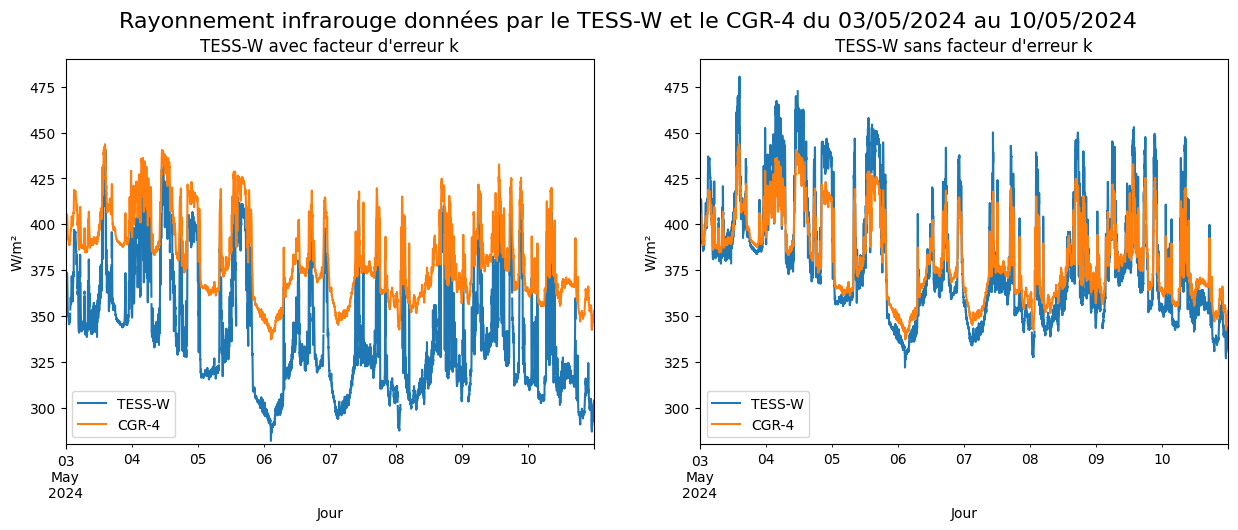

In [48]:
df['DateTime'] = pd.to_datetime(df['day']+ ' ' + df['hour'], dayfirst = True)
Datetime = df.set_index(df['DateTime'], inplace=True)
k = 40 # facteur d'erreur 
IR_TESS = 5.670374*10**-8*(df['tsky'] + 273)**4

fig, ax8 = plt.subplots(1,2)

IR_TESS.plot(ax=ax8[0], figsize=(15,5), label = 'TESS-W')
df['IR 1'].plot(ax=ax8[0], figsize=(15,5), label = 'CGR-4')
(IR_TESS+k).plot(ax=ax8[1], figsize=(15,5), label = 'TESS-W')
df['IR 1'].plot(ax=ax8[1], figsize=(15,5), label = 'CGR-4')

ax8[0].set_title("TESS-W avec facteur d'erreur k")
ax8[0].set_xlabel('Jour')
ax8[0].set_ylabel('W/m²')
ax8[0].set_ylim(280, 490)
ax8[0].legend(loc='lower left')

ax8[1].set_title("TESS-W sans facteur d'erreur k")
ax8[1].set_xlabel('Jour')
ax8[1].set_ylabel('W/m²')
ax8[1].set_ylim(280, 490)
ax8[1].legend(loc='lower left')

fig.suptitle("Rayonnement infrarouge données par le TESS-W et le CGR-4 du 03/05/2024 au 10/05/2024" , fontsize=16)

37.92
20.8


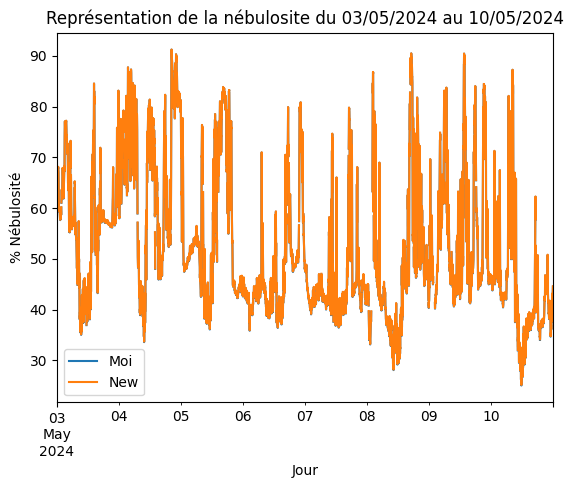

In [68]:
Neb = 100 - (df['tamb'] - df['tsky']) * 100 / (df['tamb'].max() - df['tsky'].min())
Neb_new = 100 - 2.2 * (df['tamb'] - df['tsky'])
print(df['tamb'].max())
print(df['tamb'].min())
Neb.plot(title='Représentation de la nébulosite du 03/05/2024 au 10/05/2024', label='Moi', xlabel = 'Jour', ylabel = '% Nébulosité')
Neb_new.plot(title='Représentation de la nébulosite du 03/05/2024 au 10/05/2024', label='New', xlabel = 'Jour', ylabel = '% Nébulosité')
plt.legend()
plt.show()

In [19]:
df['day 03-04'] = pd.concat([df['day'], df2['day']], ignore_index=True)
# df['hour 03-04'] = pd.concat([df['hour'], df2['hour']])
# df['DateTime'] = pd.to_datetime(df['day 03-04'] + ' ' + df['hour 03-04'], dayfirst = True)
print(df['day 03-04'])
# DateTime = df.set_index(df['DateTime'], inplace=True)
# df['Tamb nuit 03-04'] = pd.concat([df['tamb nuit'], df2['tamb nuit']])
# df['Tamb nuit 03-04'].plot()

hour
00:00    NaN
00:01    NaN
00:02    NaN
00:03    NaN
00:04    NaN
        ... 
23:55    NaN
23:56    NaN
23:57    NaN
23:58    NaN
23:59    NaN
Name: day 03-04, Length: 1440, dtype: object


<Axes: xlabel='DateTime'>

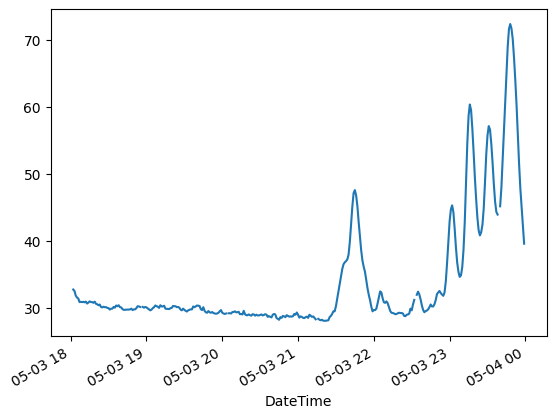

In [60]:
df_all = pd.concat([df, df2[1:1441]], ignore_index=True)
df_all['DateTime'] = pd.to_datetime(df_all['day'] + ' ' + df_all['hour'], dayfirst = True)
DateTime = df_all.set_index(df_all['DateTime'], inplace=True)

delta_T = df_all['tamb nuit'][1082:1832] - df_all['tsky nuit'][1082:1832]

Neb = 100 - (delta_T * 100)/(df_all['tamb nuit'][1082:1832].max()-df_all['tamb nuit'][1082:1832].min())
Neb.plot()